In [1]:
import numpy as numpy
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_data = pd.read_parquet('../data/OneDrive_1_11-14-2023/original.parquet')

In [3]:
df_data.head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4


#### 1. Piechart for event_name

In [4]:
event_counts = df_data.groupby(['event_name'], as_index=False)[['session_id']].count()

In [5]:
event_counts

,event_name,session_id
0,checkpoint,71028
1,cutscene_click,2703035
2,map_click,517242
3,map_hover,945159
4,navigate_click,11326433
5,notebook_click,564544
6,notification_click,649001
7,object_click,2198211
8,object_hover,1057085
9,observation_click,212355


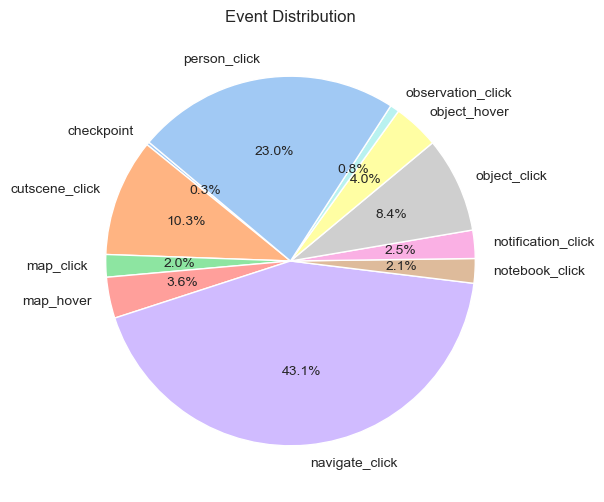

In [6]:
sns.set(style="whitegrid")

# 绘制饼状图
plt.figure(figsize=(6, 6))
plt.pie(event_counts['session_id'], labels=event_counts['event_name'], autopct='%1.1f%%', startangle=140, textprops={'fontsize': 10}, colors=sns.color_palette("pastel"))

# 添加标题
plt.title('Event Distribution')

# 显示图形
plt.show()

#### 2. Text manipulation

In [7]:
df_data.columns

Index(['session_id', 'index', 'elapsed_time', 'event_name', 'name', 'level',
       'page', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y',
       'hover_duration', 'text', 'fqid', 'room_fqid', 'text_fqid',
       'fullscreen', 'hq', 'music', 'level_group'],
      dtype='object')

In [8]:
df_data['text'].nunique()

597

In [9]:
df_data['text'] = df_data['text'].apply(lambda x: None if pd.notna(x) and x.startswith('\\u') else x)

In [10]:
df_data[df_data['text'] == 'undefined']

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
58,20090312431273200,58,62879,cutscene_click,basic,1,NaN,201.667176,-185.890485,437.0,448.0,NaN,undefined,groupconvo,tunic.historicalsociety.entry,tunic.historicalsociety.entry.groupconvo,0,0,1,0-4
59,20090312431273200,59,65459,cutscene_click,basic,1,NaN,279.828631,6.256424,485.0,330.0,NaN,undefined,groupconvo,tunic.historicalsociety.entry,tunic.historicalsociety.entry.groupconvo,0,0,1,0-4
73,20090312431273200,73,79223,cutscene_click,basic,2,NaN,-138.994909,5.876388,307.0,329.0,NaN,undefined,cs,tunic.historicalsociety.collection,tunic.historicalsociety.collection.cs,0,0,1,0-4
179,20090312431273200,189,235717,cutscene_click,basic,5,NaN,-623.075568,-157.066786,308.0,470.0,NaN,undefined,what_happened,tunic.historicalsociety.closet_dirty,tunic.historicalsociety.closet_dirty.what_happ...,0,0,1,5-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26296349,22100221145014656,1008,4566428,cutscene_click,basic,17,NaN,268.298670,311.460327,711.0,94.0,NaN,undefined,savedteddy,tunic.historicalsociety.basement,tunic.historicalsociety.basement.savedteddy,0,0,1,13-22
26296350,22100221145014656,1009,4569934,cutscene_click,basic,17,NaN,-520.671027,142.793661,145.0,215.0,NaN,undefined,savedteddy,tunic.historicalsociety.basement,tunic.historicalsociety.basement.savedteddy,0,0,1,13-22
26296351,22100221145014656,1010,4572868,cutscene_click,basic,17,NaN,268.298670,-43.994218,711.0,349.0,NaN,undefined,savedteddy,tunic.historicalsociety.basement,tunic.historicalsociety.basement.savedteddy,0,0,1,13-22
26296352,22100221145014656,1011,4575968,cutscene_click,basic,17,NaN,-520.671027,-208.479066,145.0,467.0,NaN,undefined,savedteddy,tunic.historicalsociety.basement,tunic.historicalsociety.basement.savedteddy,0,0,1,13-22


In [15]:
# df_data.to_parquet('../data/text_manipulated/all_text_manipulated.parquet')